## EDA over Airbnb data

Exploration for Airbnb data, focus on price.

credit: https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data


In [1]:
import pandas as pd

df = pd.read_csv('./AB_US_2020.csv')

df.head()

/var/folders/6q/3zldx_bx2ld0sxkhz7d4mftm0000gn/T/ipykernel_19718/3520447887.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./AB_US_2020.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [2]:
df['price'].describe()

count    226030.000000
mean        219.716529
std         570.353609
min           0.000000
25%          75.000000
50%         121.000000
75%         201.000000
max       24999.000000
Name: price, dtype: float64

In [3]:
#see price and city correlation
price_by_city = df[["price","city"]].groupby('city').mean()
price_by_city.head(20)

,price
city,
Asheville,196.639344
Austin,269.290054
Boston,170.331836
Broward County,230.093295
Cambridge,163.072886
Chicago,153.020009
Clark County,213.756660
Columbus,321.718950
Denver,158.860714


(0.0, 1000.0)

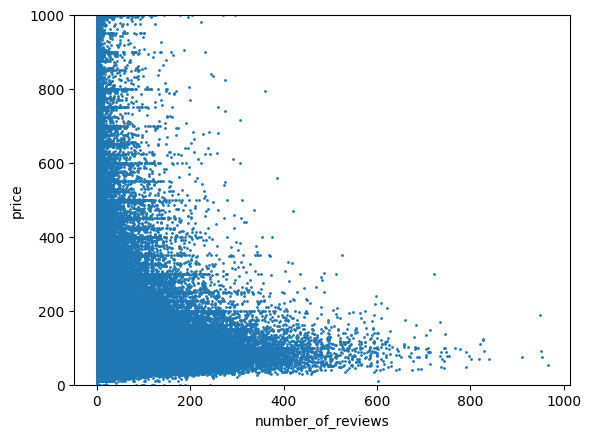

In [4]:
#check scatter plot for #reviews and price
review_price = df[["number_of_reviews","price"]]
ax = review_price.plot.scatter(x="number_of_reviews",y="price", s=1)
ax.set_ylim(0,1000)

In [5]:
#check neighbourhood group
ng = df["neighbourhood_group"].value_counts()
print(ng.head(20))


Manhattan               20236
Brooklyn                18263
City of Los Angeles     17544
Other Cities            11463
Maui                     7897
Honolulu                 6313
Queens                   5746
Hawaii                   4977
Kauai                    3247
Unincorporated Areas     2529
Newport                  1412
Other neighborhoods      1253
Washington               1201
Bronx                    1185
Providence               1056
Downtown                 1043
Capitol Hill              682
Central Area              572
Queen Anne                459
West Seattle              378
Name: neighbourhood_group, dtype: int64


In [11]:
import plotly.express as px
fig = px.bar(x=ng.index,y=ng.values,color=ng.index,text=ng.values,
                title="Neighbourhood Group Count")
fig.show()

In [39]:
#check room type count by neighbourhood group
room_type=df[["room_type","neighbourhood_group"]].value_counts().reset_index()
#rename column name
room_type.rename(columns={0:"counts"},inplace=True)
#select certain neighbour group
room_type = room_type[
    room_type["neighbourhood_group"].isin(
        ["Manhattan","Queens","Brooklyn","Bronx"]
        )
    ]
#preview some data
print(room_type.head(10))
#plot
fig = px.pie(
    values=room_type["counts"],
    names=room_type["room_type"],
    facet_col=room_type["neighbourhood_group"],
    title="Room Type Distribution",
    width=900,
    height=400
)
fig.show()


          room_type neighbourhood_group  counts
1   Entire home/apt           Manhattan   11993
2      Private room            Brooklyn    8973
3   Entire home/apt            Brooklyn    8936
4      Private room           Manhattan    7504
11     Private room              Queens    3496
13  Entire home/apt              Queens    2057
22     Private room               Bronx     721
27  Entire home/apt               Bronx     417
30      Shared room           Manhattan     389
32       Hotel room           Manhattan     350


In [22]:
#check house by map
fig = px.scatter_mapbox(
    df[df["neighbourhood_group"]=="Manhattan"],
    lat="latitude",
    lon="longitude",
    opacity=0.05,
    hover_name="neighbourhood_group",
    color="price",
    title="Airbnb Price by Location (Manhattan)",
    #template="plotly_dark",
    zoom=11,
    width=600,
    height=800
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()